# NBaIoT SOMKNN CLASSIFY

## Device 4

- Training on device 4 (using both Mirai and Gafgyt).
- Testing on device 4 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 4

In [8]:
train_index

4

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((175240, 115), (175240,)),
 ((312723, 115), (312723,)),
 ((610714, 115), (610714,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((122668, 115), (52572, 115), (122668,), (52572,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((218906, 115), (93817, 115), (218906,), (93817,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((427499, 115), (183215, 115), (427499,), (183215,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

122668


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(122668, 115) (122668,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(245336, 115) (245336,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(122668, 115) (122668,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(245336, 115) (245336,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(146389, 115) (146389,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((52572, 115), (93817, 115), (52572,), (93817,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(235787, 115) (235787,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(165050, 115) (165050,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='rand')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 3.30017036e-03  4.54327336e-02  3.82635778e-18 ...  4.88741949e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 3.29612813e-03  4.13024864e-02  2.39672960e-11 ...  3.79665784e-18
  -1.09282808e-34  0.00000000e+00]
 [ 3.29748335e-03  1.07360998e-01  6.99620609e-06 ...  4.21063037e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.14652201e-02  4.54327336e-02  4.09966904e-16 ...  4.59138745e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 9.88821306e-03  4.54327336e-02  3.55304651e-12 ...  4.47326334e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.84420109e-03  4.93568758e-02  1.23448964e-04 ...  1.61130067e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


Perform SOM (turned) train random
0.5
Total train time: 1372.531830072403


### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.937     0.996     0.966     52572
           2      0.998     0.963     0.980     93817

    accuracy                          0.975    146389
   macro avg      0.967     0.979     0.973    146389
weighted avg      0.976     0.975     0.975    146389



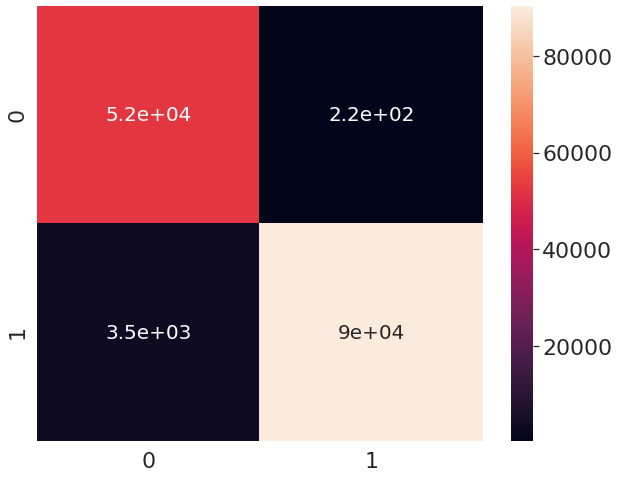

AUC score:  0.9792432247508427


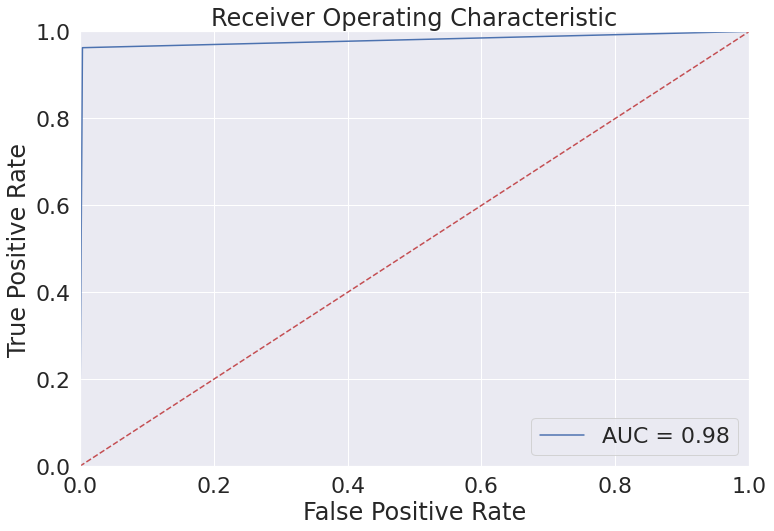

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.937     0.996     0.966     52572
           2      0.998     0.963     0.980     93817

    accuracy                          0.975    146389
   macro avg      0.967     0.979     0.973    146389
weighted avg      0.976     0.975     0.975    146389



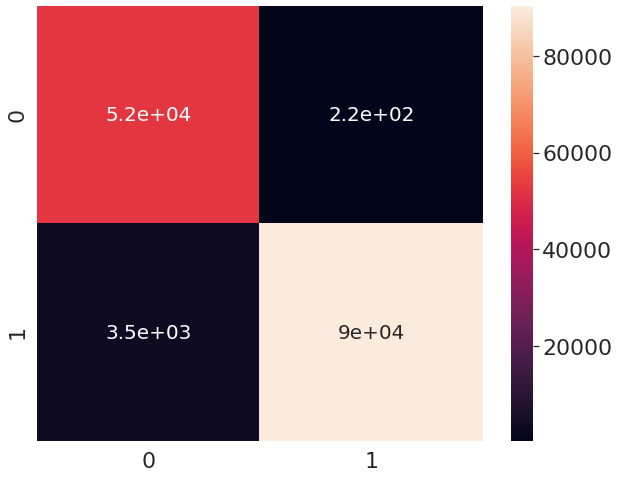

AUC score:  0.9792432247508427


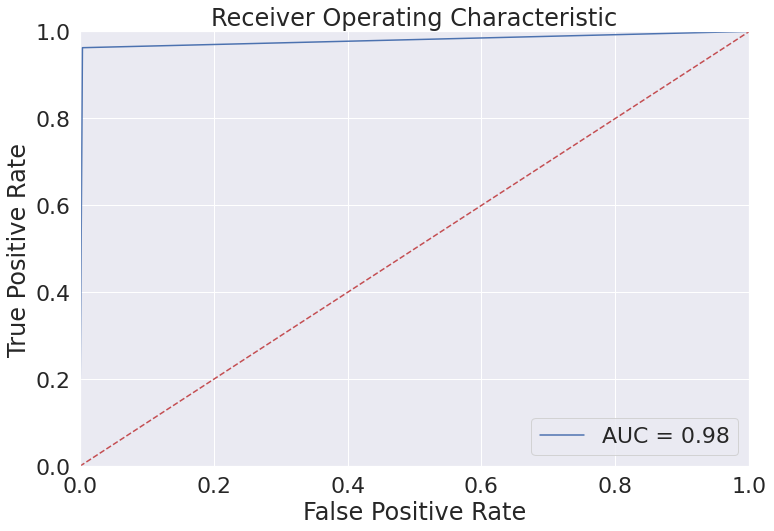

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.996     0.997     36592
           2      0.999     0.999     0.999    128458

    accuracy                          0.999    165050
   macro avg      0.998     0.998     0.998    165050
weighted avg      0.999     0.999     0.999    165050



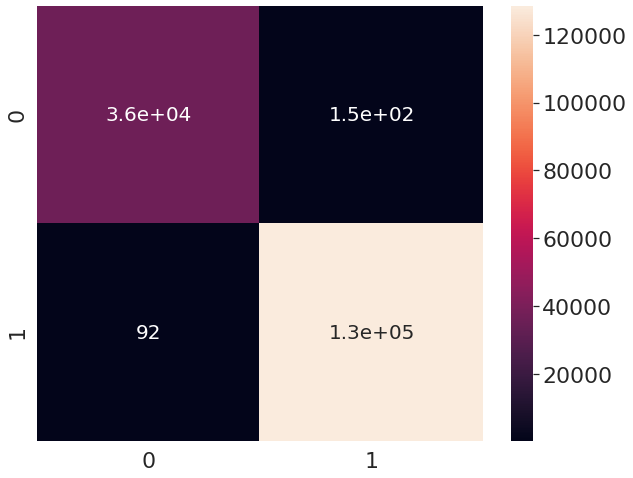

AUC score:  0.9975512854032627


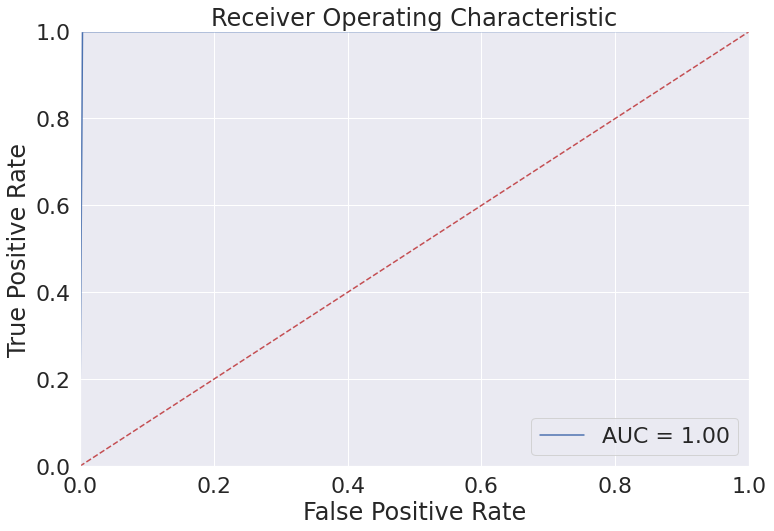

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.996     0.997     36592
           2      0.999     0.999     0.999    128458

    accuracy                          0.999    165050
   macro avg      0.998     0.998     0.998    165050
weighted avg      0.999     0.999     0.999    165050



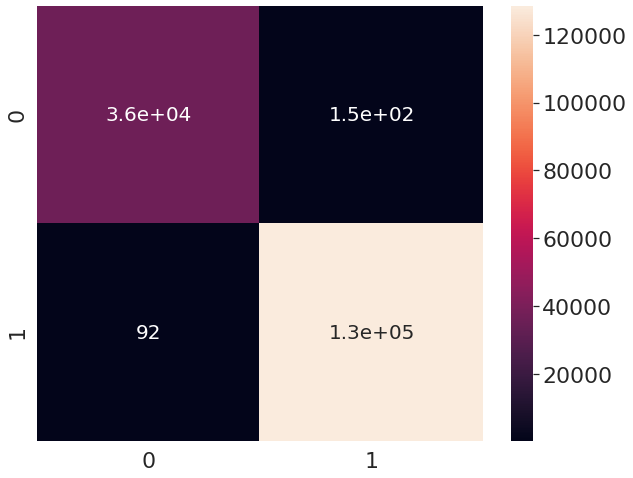

AUC score:  0.9975512854032627


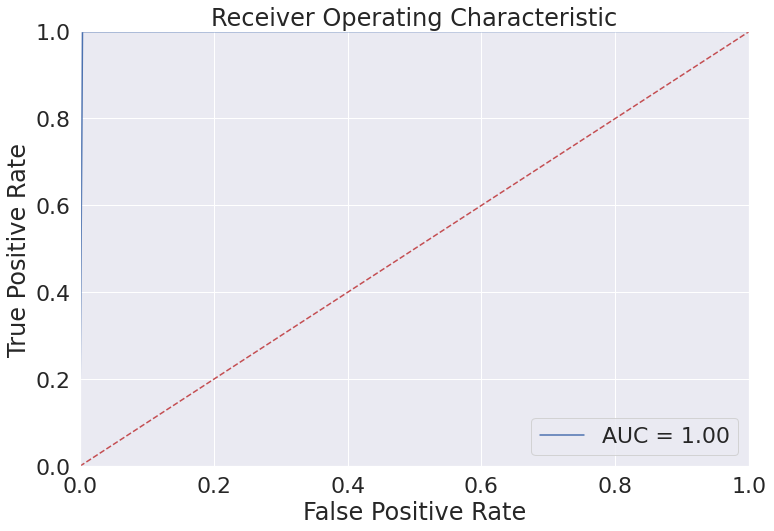

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [74]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='tpe')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 3.30017036e-03  4.54327336e-02  3.82635778e-18 ...  4.88741949e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 3.29612813e-03  4.13024864e-02  2.39672960e-11 ...  3.79665784e-18
  -1.09282808e-34  0.00000000e+00]
 [ 3.29748335e-03  1.07360998e-01  6.99620609e-06 ...  4.21063037e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.14652201e-02  4.54327336e-02  4.09966904e-16 ...  4.59138745e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 9.88821306e-03  4.54327336e-02  3.55304651e-12 ...  4.47326334e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.84420109e-03  4.93568758e-02  1.23448964e-04 ...  1.61130067e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on first device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.998    146389
   macro avg      0.998     0.998     0.998    146389
weighted avg      0.998     0.998     0.998    146389



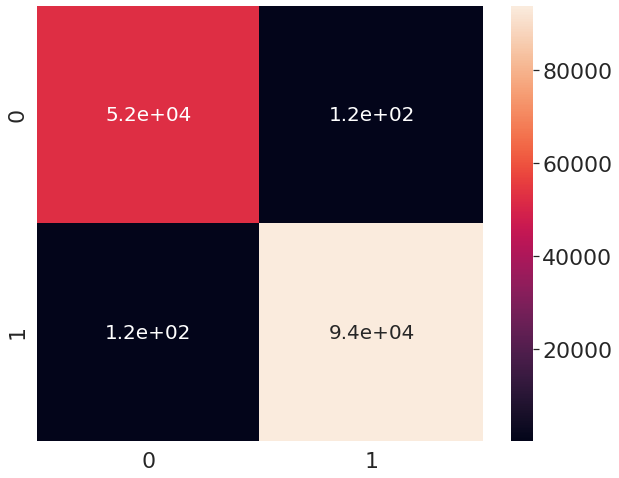

AUC score:  0.9981864515772928


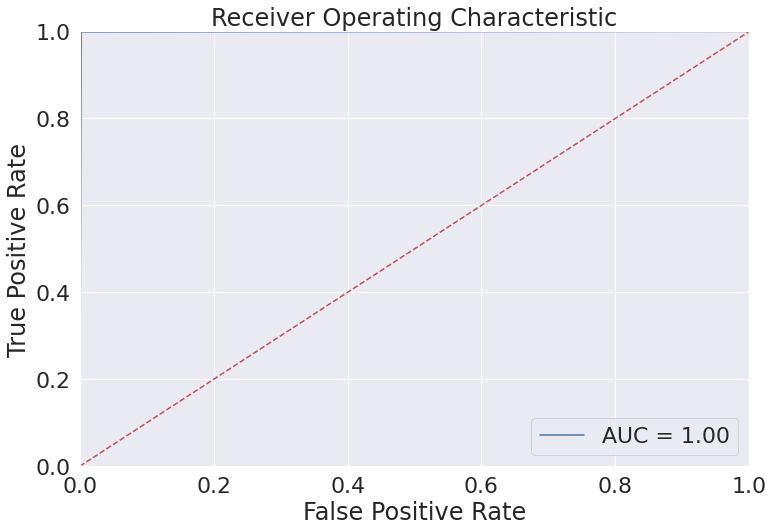

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.998    146389
   macro avg      0.998     0.998     0.998    146389
weighted avg      0.998     0.998     0.998    146389



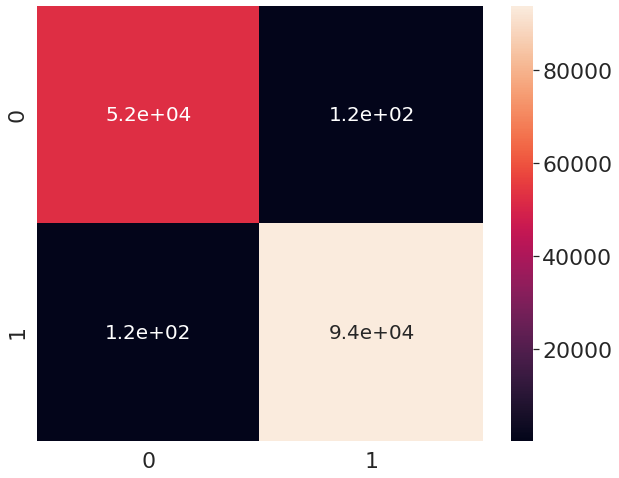

AUC score:  0.9981917811017926


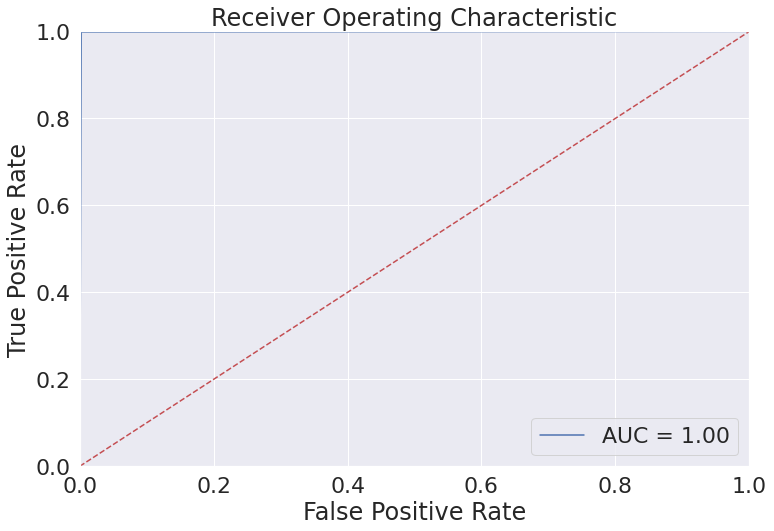

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.335     0.998     0.501     36592
           2      0.999     0.435     0.606    128458

    accuracy                          0.560    165050
   macro avg      0.667     0.716     0.553    165050
weighted avg      0.851     0.560     0.583    165050



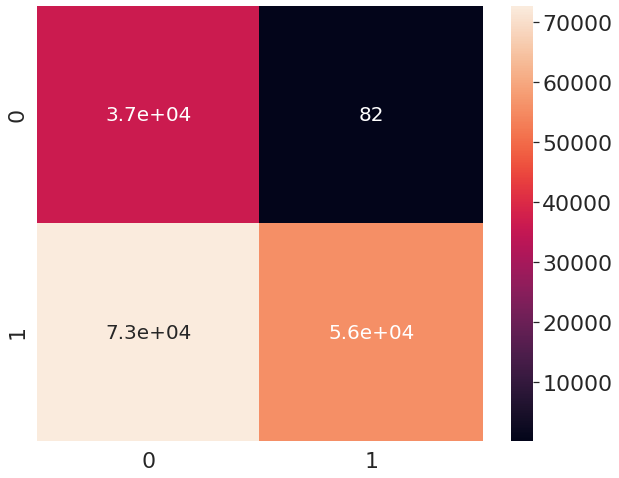

AUC score:  0.7162501946246488


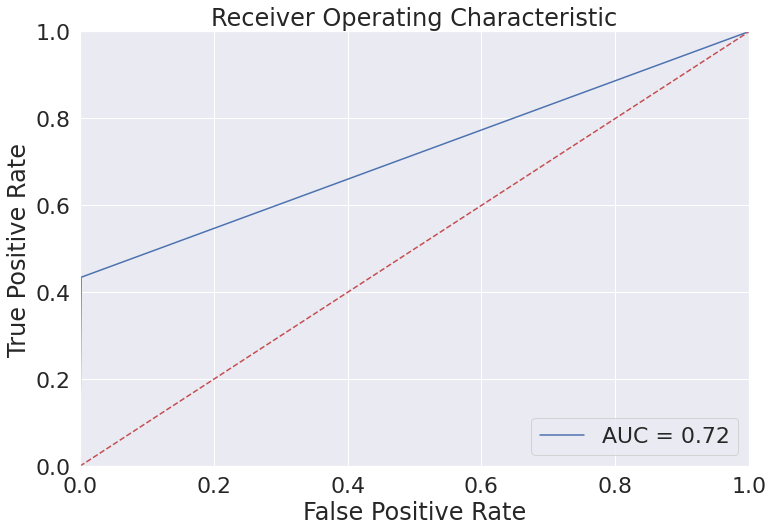

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [77]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.335     0.998     0.501     36592
           2      0.999     0.435     0.606    128458

    accuracy                          0.560    165050
   macro avg      0.667     0.716     0.553    165050
weighted avg      0.851     0.560     0.583    165050



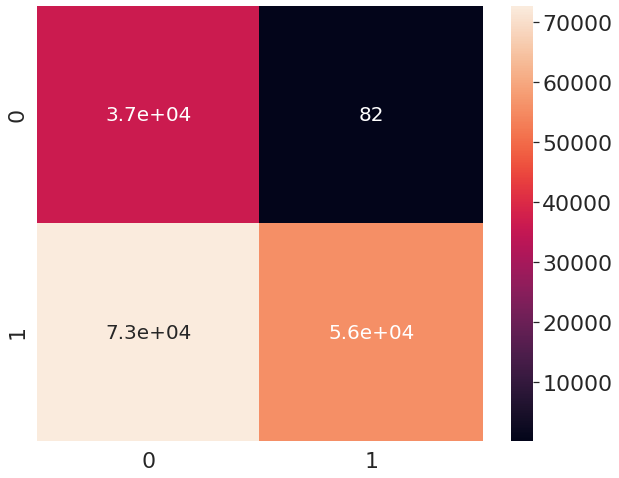

AUC score:  0.7162501946246488


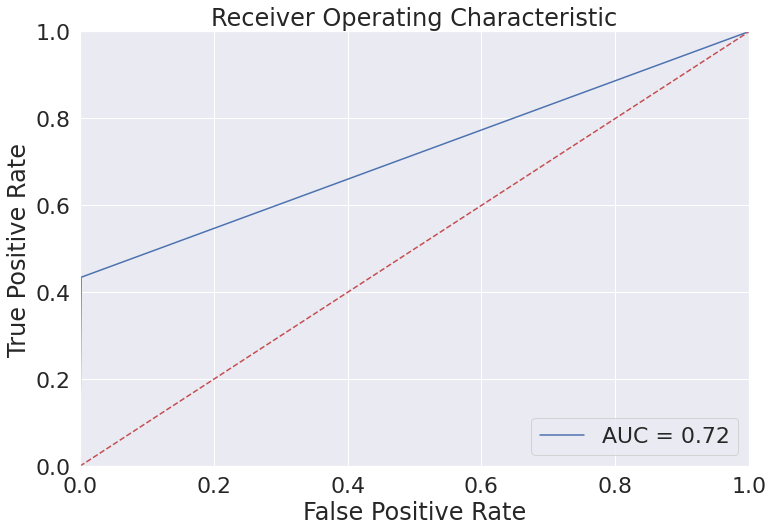

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [78]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [79]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 3.30017036e-03  4.54327336e-02  3.82635778e-18 ...  4.88741949e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 3.29612813e-03  4.13024864e-02  2.39672960e-11 ...  3.79665784e-18
  -1.09282808e-34  0.00000000e+00]
 [ 3.29748335e-03  1.07360998e-01  6.99620609e-06 ...  4.21063037e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.14652201e-02  4.54327336e-02  4.09966904e-16 ...  4.59138745e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 9.88821306e-03  4.54327336e-02  3.55304651e-12 ...  4.47326334e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.84420109e-03  4.93568758e-02  1.23448964e-04 ...  1.61130067e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.998     52572
           2      0.999     0.998     0.999     93817

    accuracy                          0.998    146389
   macro avg      0.998     0.998     0.998    146389
weighted avg      0.998     0.998     0.998    146389



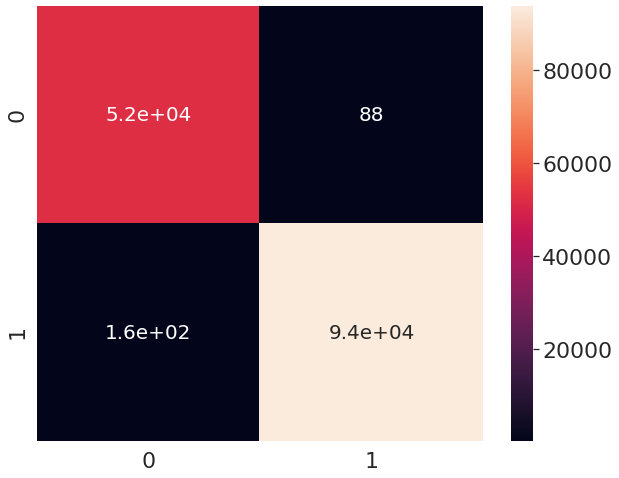

AUC score:  0.9983209877045434


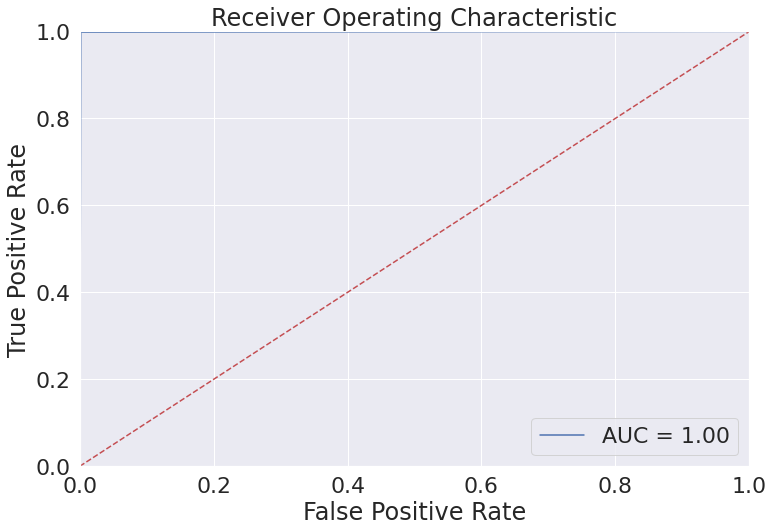

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [80]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.998     52572
           2      0.999     0.998     0.999     93817

    accuracy                          0.998    146389
   macro avg      0.998     0.998     0.998    146389
weighted avg      0.998     0.998     0.998    146389



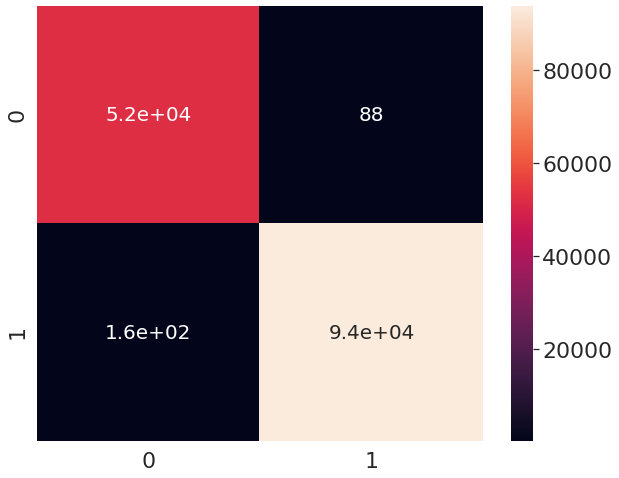

AUC score:  0.9983209877045434


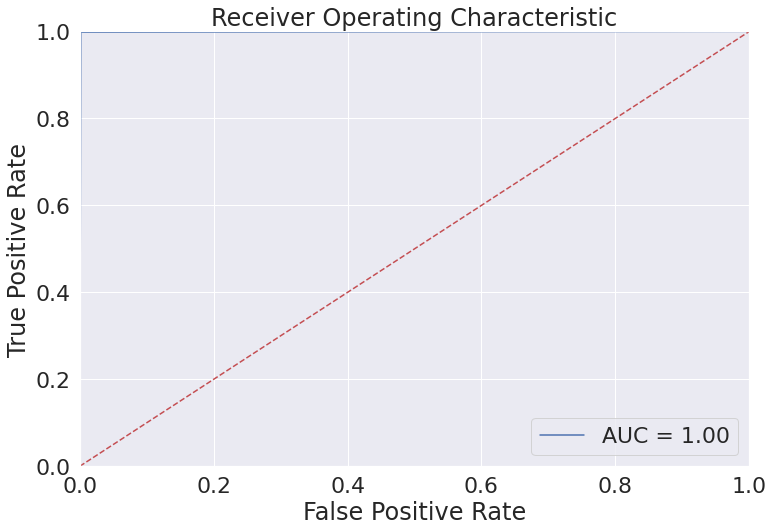

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [81]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.376     0.998     0.547     36592
           2      0.999     0.529     0.691    128458

    accuracy                          0.633    165050
   macro avg      0.688     0.763     0.619    165050
weighted avg      0.861     0.633     0.659    165050



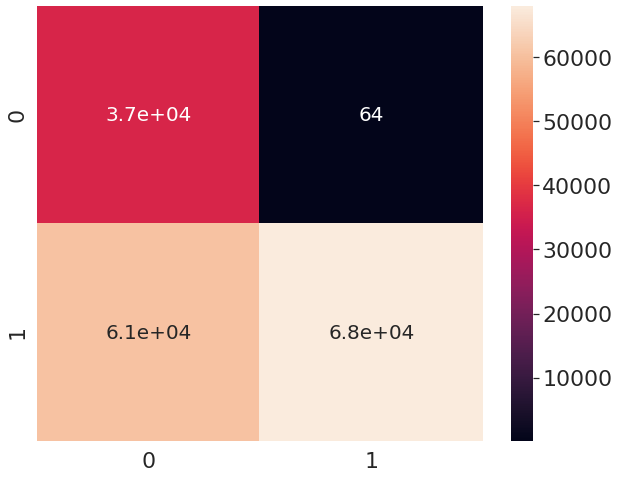

AUC score:  0.763441455104996


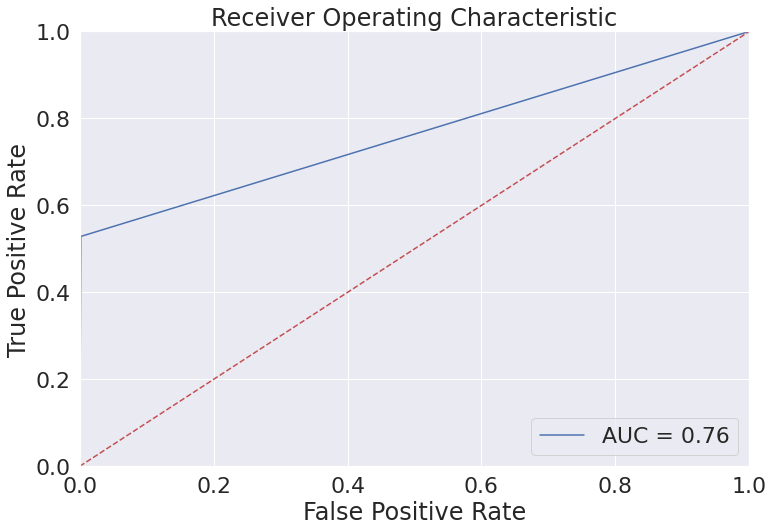

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [82]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.376     0.998     0.547     36592
           2      0.999     0.529     0.691    128458

    accuracy                          0.633    165050
   macro avg      0.688     0.763     0.619    165050
weighted avg      0.861     0.633     0.659    165050



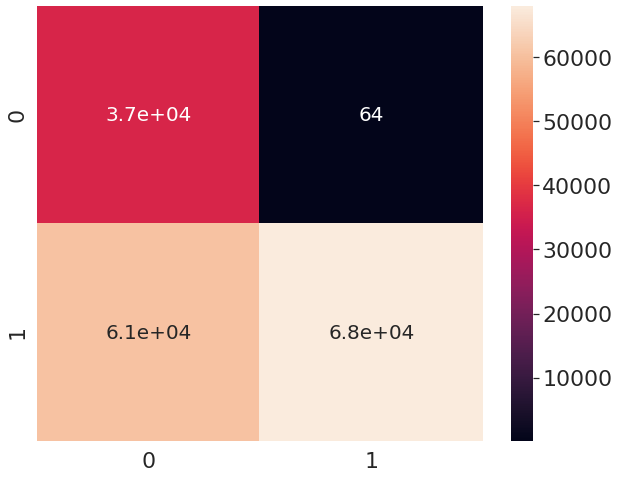

AUC score:  0.763441455104996


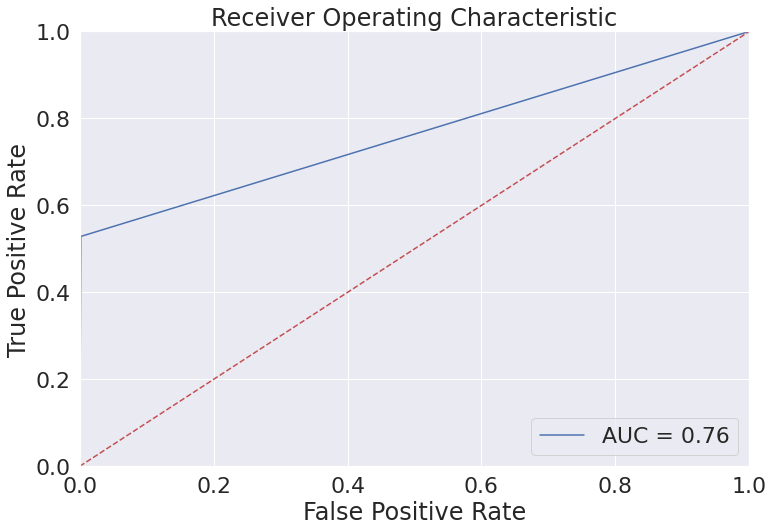

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [83]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.4. Anneal

### Train

In [84]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='anneal')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 3.30017036e-03  4.54327336e-02  3.82635778e-18 ...  4.88741949e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 3.29612813e-03  4.13024864e-02  2.39672960e-11 ...  3.79665784e-18
  -1.09282808e-34  0.00000000e+00]
 [ 3.29748335e-03  1.07360998e-01  6.99620609e-06 ...  4.21063037e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.14652201e-02  4.54327336e-02  4.09966904e-16 ...  4.59138745e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 9.88821306e-03  4.54327336e-02  3.55304651e-12 ...  4.47326334e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.84420109e-03  4.93568758e-02  1.23448964e-04 ...  1.61130067e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.999    146389
   macro avg      0.998     0.999     0.998    146389
weighted avg      0.999     0.999     0.999    146389



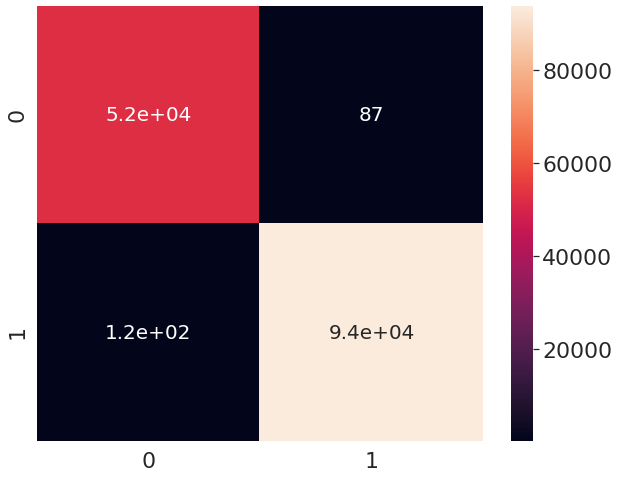

AUC score:  0.9985436794507235


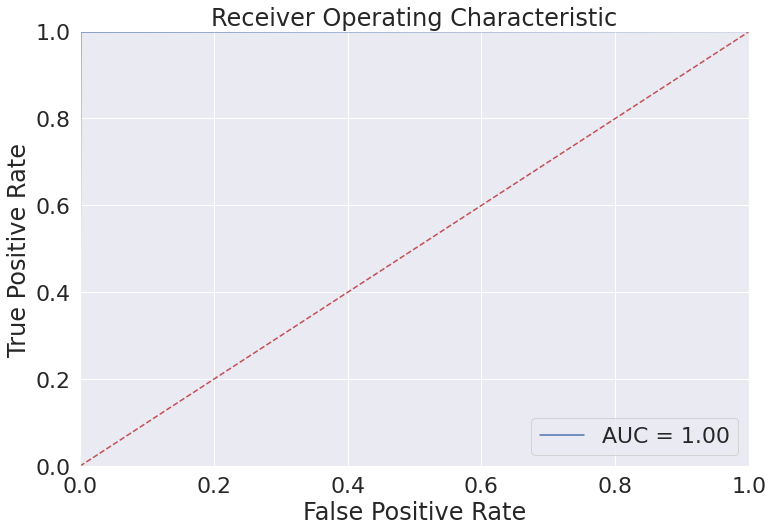

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [85]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.999    146389
   macro avg      0.998     0.999     0.998    146389
weighted avg      0.999     0.999     0.999    146389



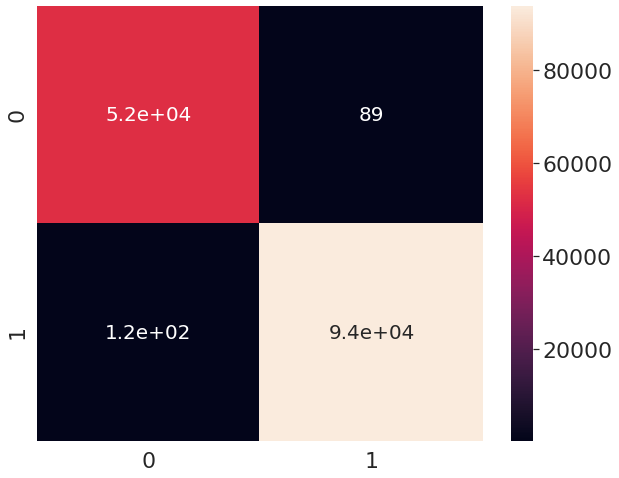

AUC score:  0.9985246579183489


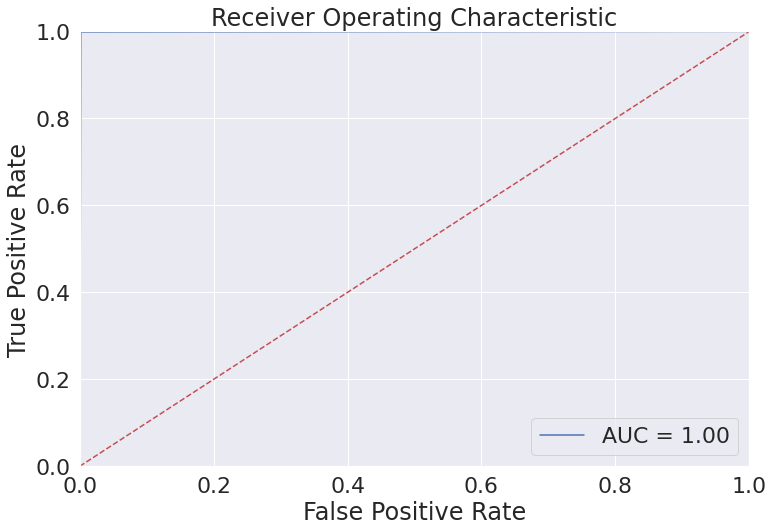

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [86]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.336     0.998     0.503     36592
           2      0.999     0.438     0.609    128458

    accuracy                          0.562    165050
   macro avg      0.667     0.718     0.556    165050
weighted avg      0.852     0.562     0.585    165050



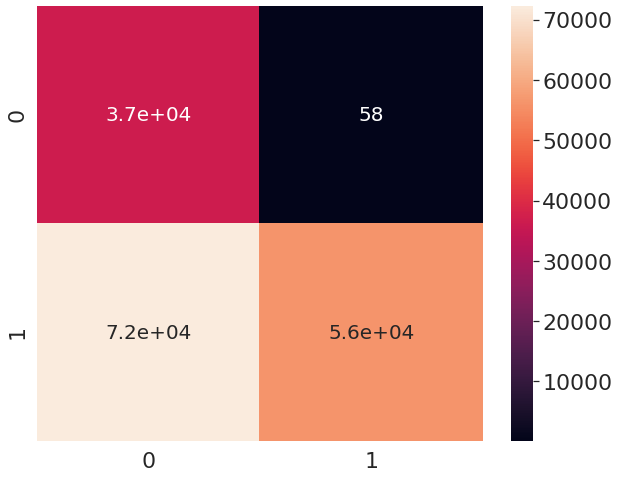

AUC score:  0.7182012337584195


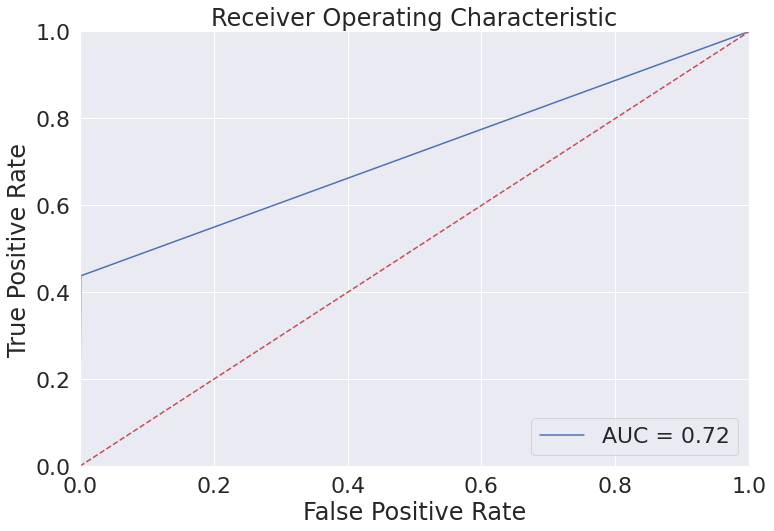

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [87]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.336     0.998     0.503     36592
           2      0.999     0.438     0.609    128458

    accuracy                          0.562    165050
   macro avg      0.667     0.718     0.556    165050
weighted avg      0.852     0.562     0.585    165050



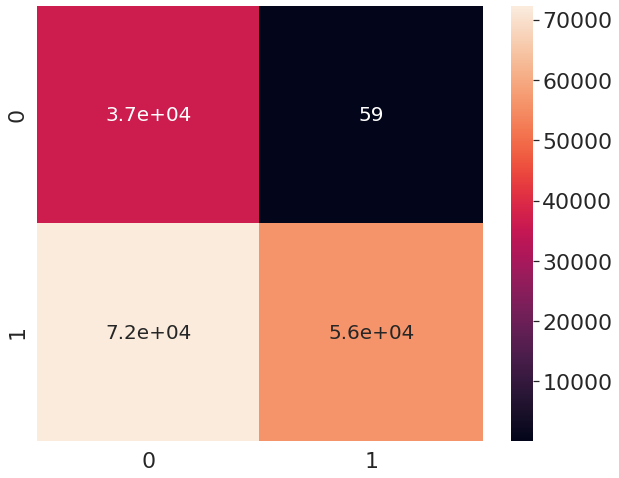

AUC score:  0.7181875695695257


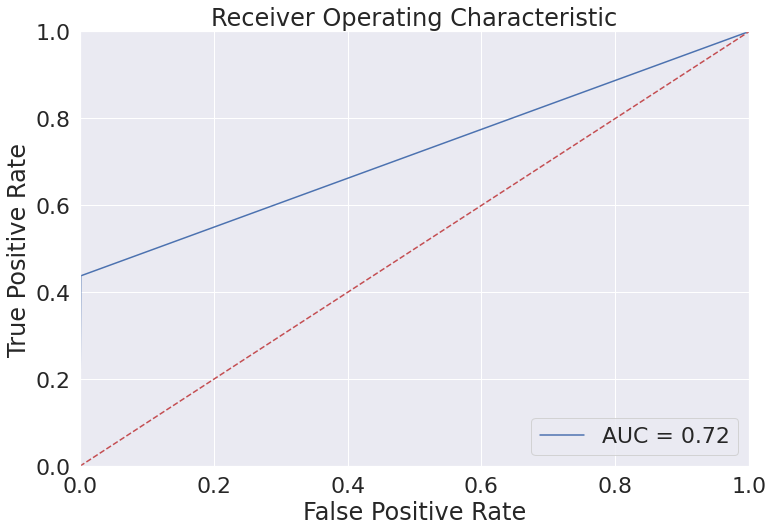

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [88]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [89]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='rand')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 2.93887366e-03  4.54327336e-02  3.82635778e-18 ...  4.89050855e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 2.93527396e-03  4.13024864e-02  2.39672960e-11 ...  3.79905749e-18
  -1.09282808e-34  0.00000000e+00]
 [ 2.93648081e-03  1.07360998e-01  6.99620609e-06 ...  4.21329168e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.02100285e-02  4.54327336e-02  4.09966904e-16 ...  4.59428941e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 8.80566931e-03  4.54327336e-02  3.55304651e-12 ...  4.47609063e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.09491029e-03  4.93568758e-02  1.23448964e-04 ...  1.61231908e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.945     0.998     0.971     52572
           2      0.999     0.967     0.983     93817

    accuracy                          0.979    146389
   macro avg      0.972     0.983     0.977    146389
weighted avg      0.980     0.979     0.979    146389



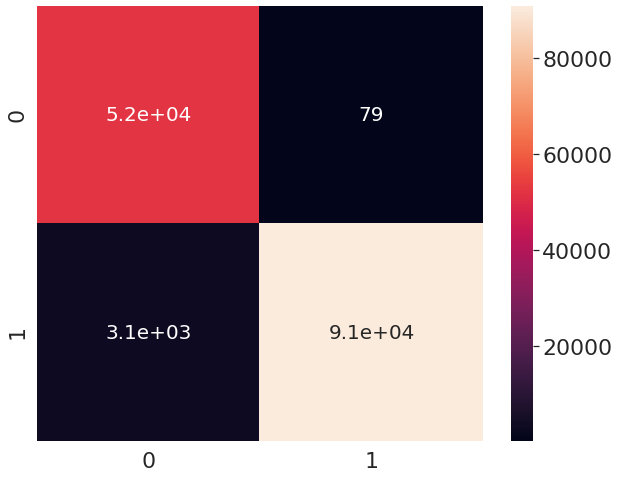

AUC score:  0.9829776111732383


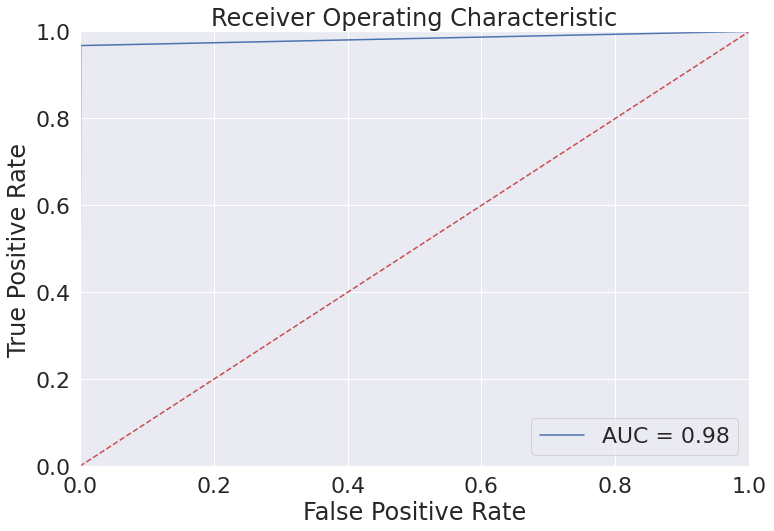

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [90]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.945     0.998     0.971     52572
           2      0.999     0.967     0.983     93817

    accuracy                          0.979    146389
   macro avg      0.972     0.983     0.977    146389
weighted avg      0.980     0.979     0.979    146389



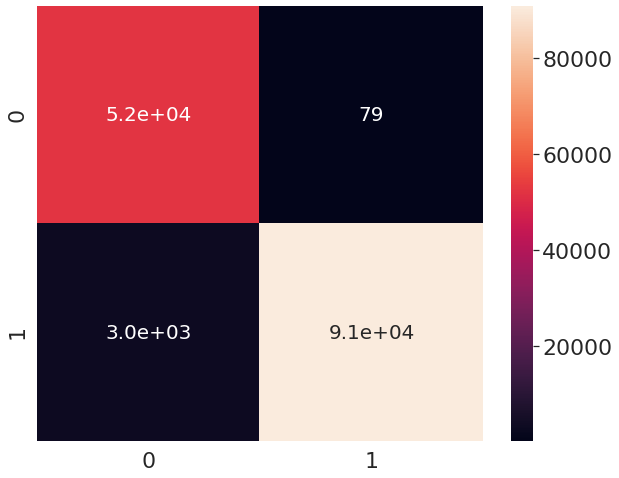

AUC score:  0.9829935997467378


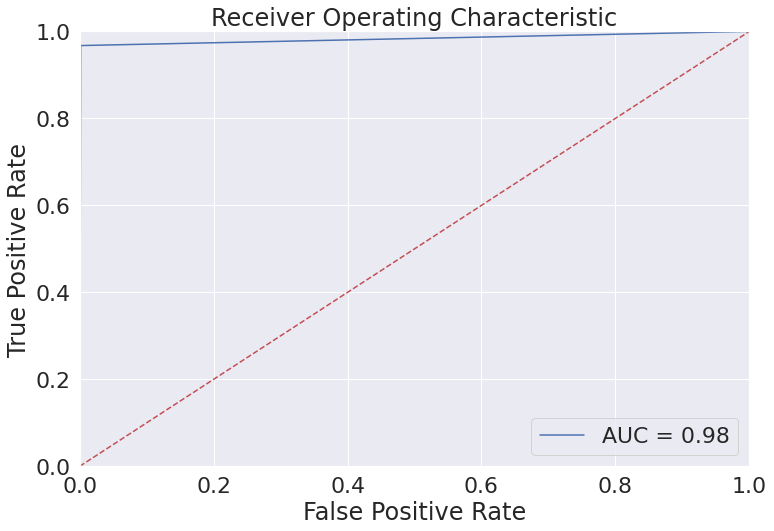

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [91]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.998     0.999     36592
           2      1.000     1.000     1.000    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.999     0.999    165050
weighted avg      0.999     0.999     0.999    165050



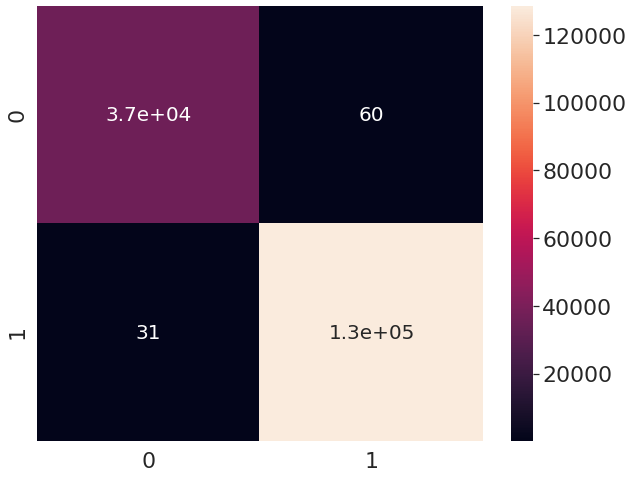

AUC score:  0.9990594866601163


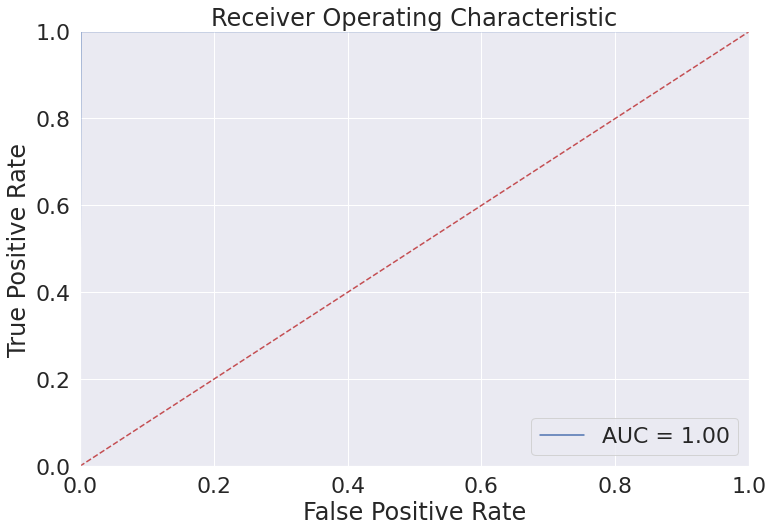

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [92]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.998     0.999     36592
           2      1.000     1.000     1.000    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.999     0.999    165050
weighted avg      0.999     0.999     0.999    165050



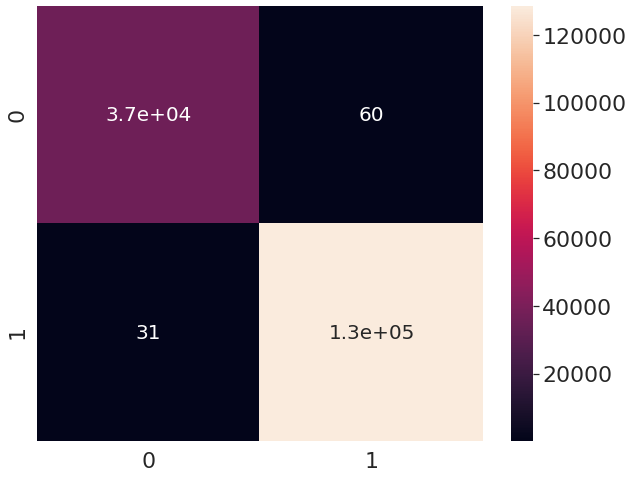

AUC score:  0.9990594866601163


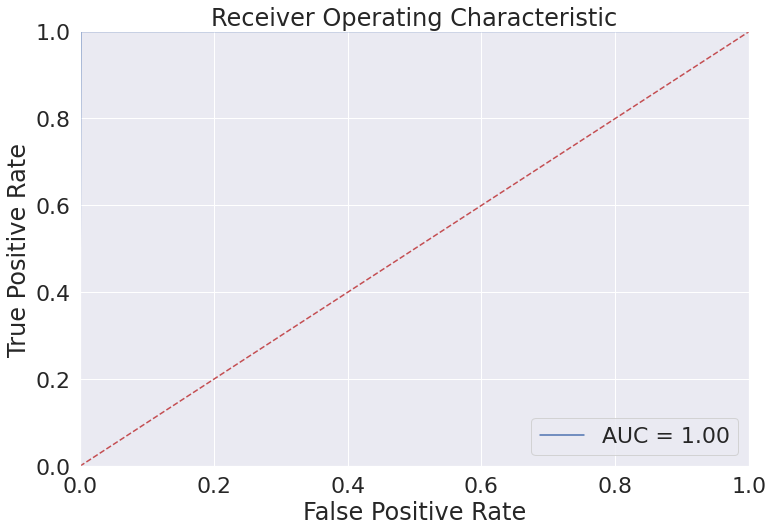

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [93]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [94]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='tpe')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 2.93887366e-03  4.54327336e-02  3.82635778e-18 ...  4.89050855e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 2.93527396e-03  4.13024864e-02  2.39672960e-11 ...  3.79905749e-18
  -1.09282808e-34  0.00000000e+00]
 [ 2.93648081e-03  1.07360998e-01  6.99620609e-06 ...  4.21329168e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.02100285e-02  4.54327336e-02  4.09966904e-16 ...  4.59428941e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 8.80566931e-03  4.54327336e-02  3.55304651e-12 ...  4.47609063e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.09491029e-03  4.93568758e-02  1.23448964e-04 ...  1.61231908e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.903     0.999     0.949     52572
           2      0.999     0.940     0.969     93817

    accuracy                          0.961    146389
   macro avg      0.951     0.969     0.959    146389
weighted avg      0.965     0.961     0.962    146389



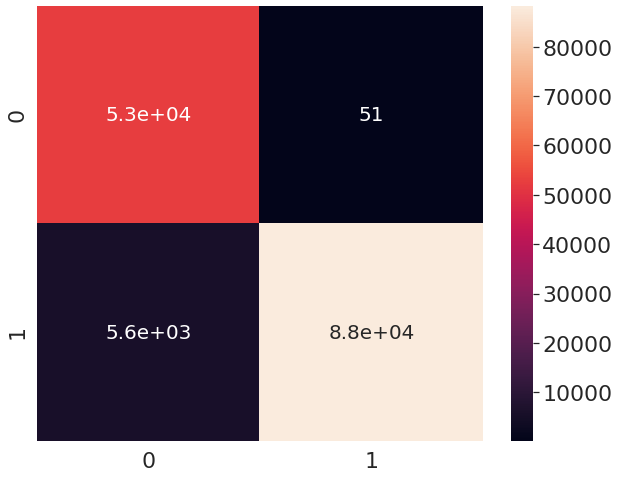

AUC score:  0.9694564327454385


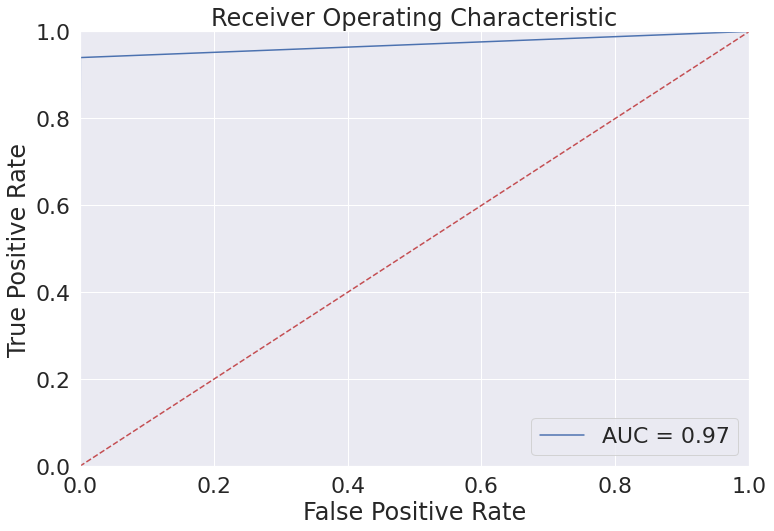

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [95]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.903     0.999     0.949     52572
           2      0.999     0.940     0.969     93817

    accuracy                          0.961    146389
   macro avg      0.951     0.969     0.959    146389
weighted avg      0.965     0.961     0.962    146389



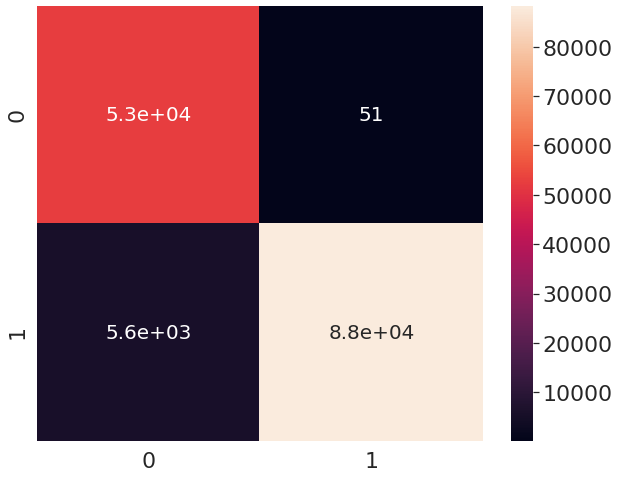

AUC score:  0.9694564327454385


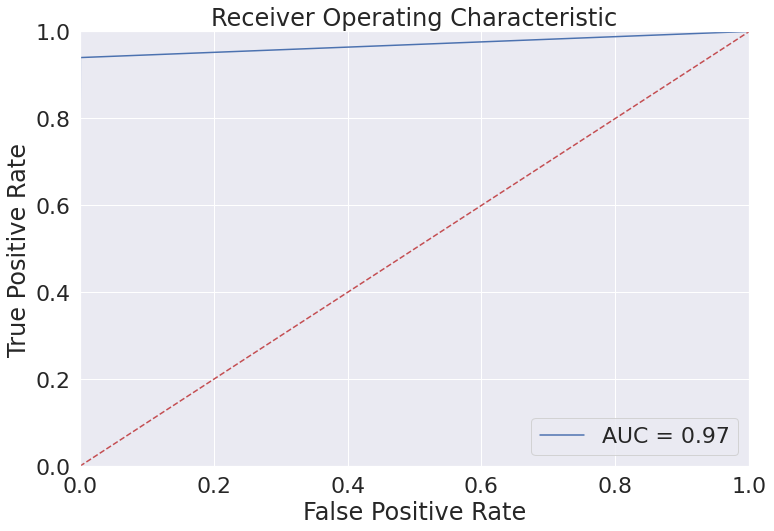

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [96]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.999     0.999     36592
           2      1.000     1.000     1.000    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.999     0.999    165050
weighted avg      0.999     0.999     0.999    165050



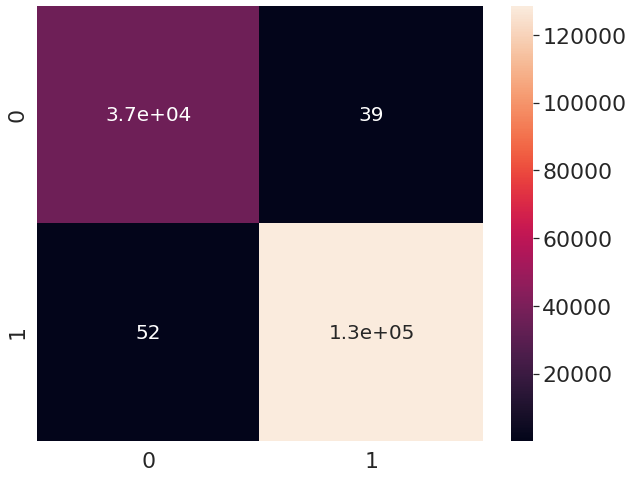

AUC score:  0.9992646958484516


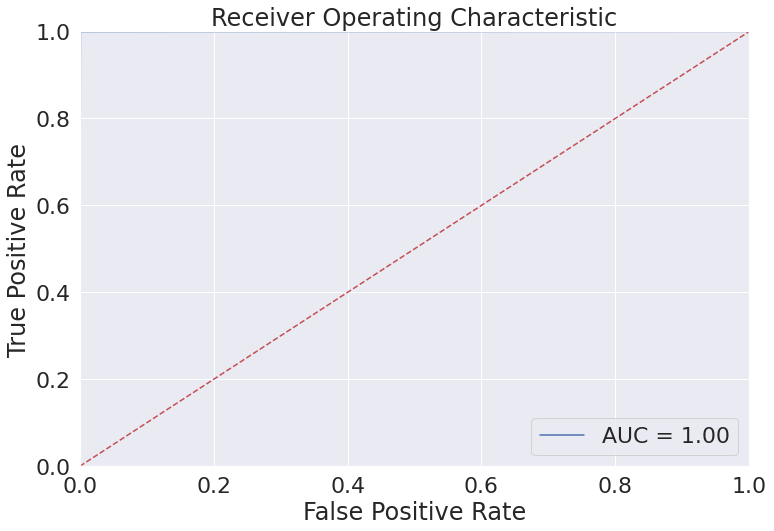

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [97]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.999     0.999     36592
           2      1.000     1.000     1.000    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.999     0.999    165050
weighted avg      0.999     0.999     0.999    165050



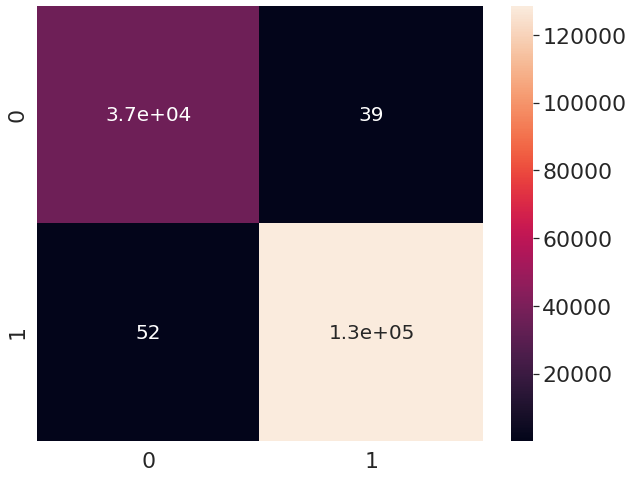

AUC score:  0.9992646958484516


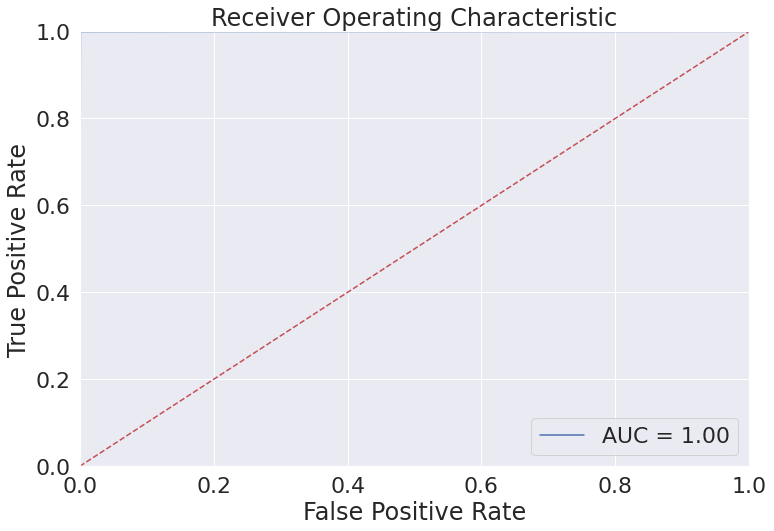

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [98]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [99]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 2.93887366e-03  4.54327336e-02  3.82635778e-18 ...  4.89050855e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 2.93527396e-03  4.13024864e-02  2.39672960e-11 ...  3.79905749e-18
  -1.09282808e-34  0.00000000e+00]
 [ 2.93648081e-03  1.07360998e-01  6.99620609e-06 ...  4.21329168e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.02100285e-02  4.54327336e-02  4.09966904e-16 ...  4.59428941e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 8.80566931e-03  4.54327336e-02  3.55304651e-12 ...  4.47609063e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.09491029e-03  4.93568758e-02  1.23448964e-04 ...  1.61231908e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.992     0.990     52572
           2      0.996     0.993     0.994     93817

    accuracy                          0.993    146389
   macro avg      0.991     0.993     0.992    146389
weighted avg      0.993     0.993     0.993    146389



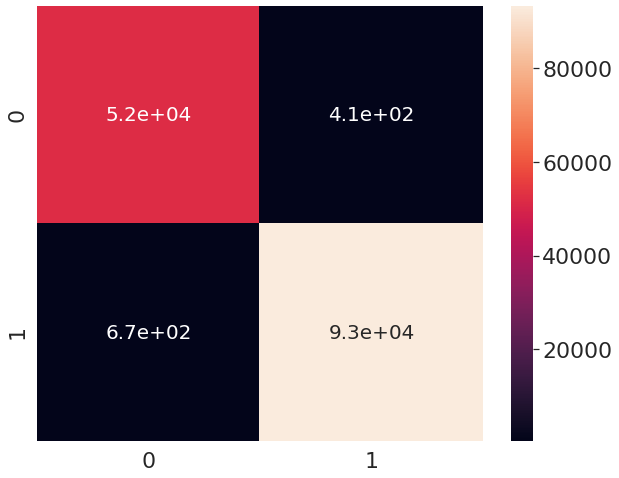

AUC score:  0.9925731770375641


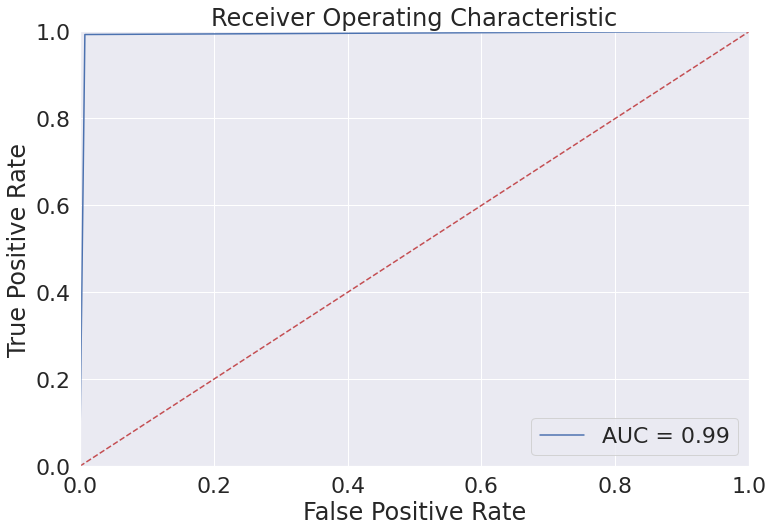

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [100]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.992     0.990     52572
           2      0.996     0.993     0.994     93817

    accuracy                          0.993    146389
   macro avg      0.992     0.993     0.992    146389
weighted avg      0.993     0.993     0.993    146389



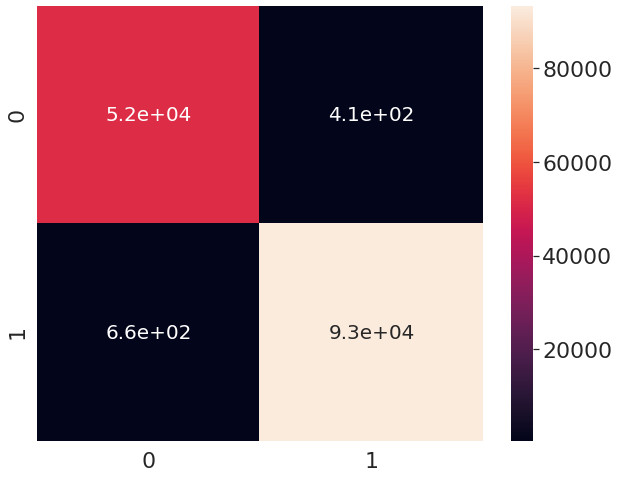

AUC score:  0.9926104837090628


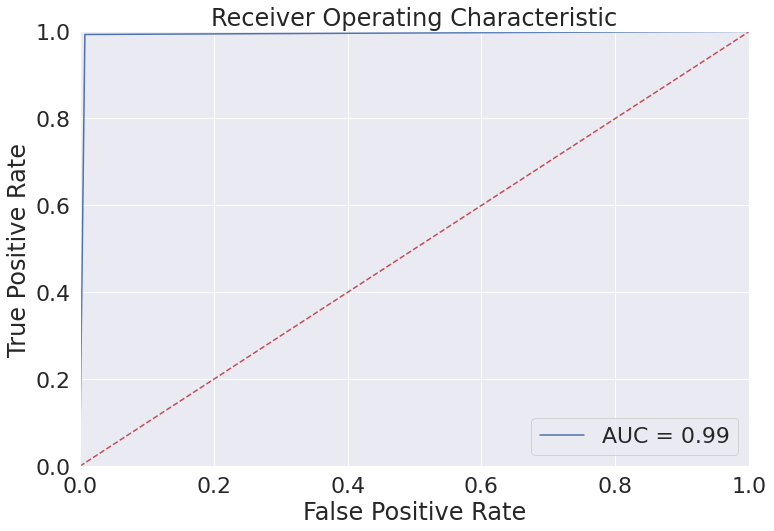

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [101]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.992     0.994     36592
           2      0.998     0.999     0.998    128458

    accuracy                          0.997    165050
   macro avg      0.997     0.995     0.996    165050
weighted avg      0.997     0.997     0.997    165050



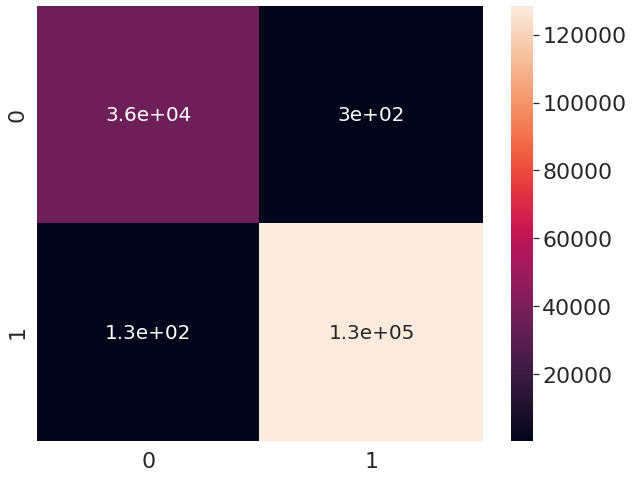

AUC score:  0.9954474930234838


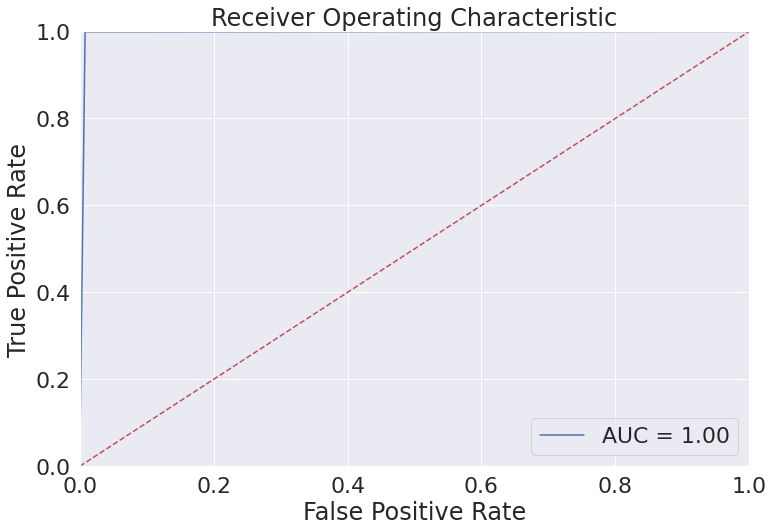

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [102]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.992     0.994     36592
           2      0.998     0.999     0.998    128458

    accuracy                          0.997    165050
   macro avg      0.997     0.995     0.996    165050
weighted avg      0.997     0.997     0.997    165050



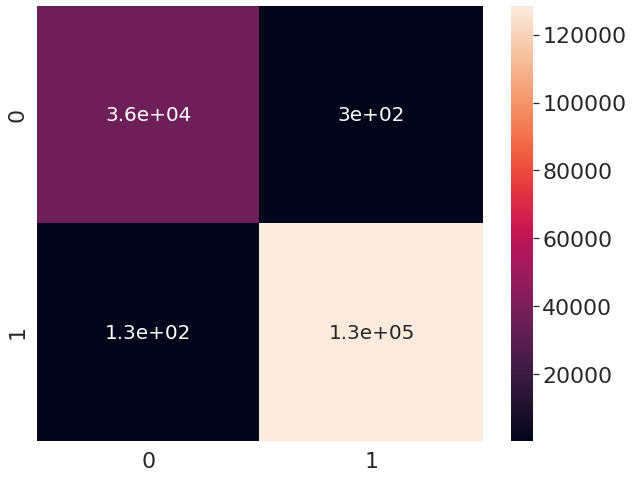

AUC score:  0.9954474930234838


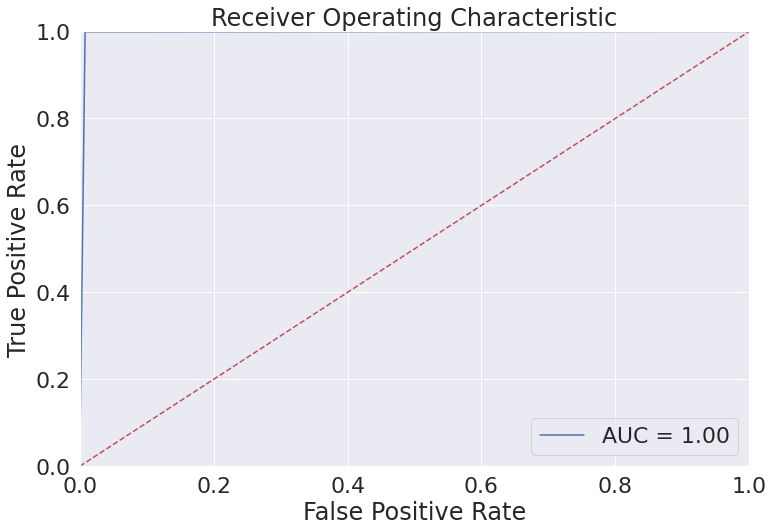

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [103]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.4. ANNEAL

### Train

In [104]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='anneal')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 2.93887366e-03  4.54327336e-02  3.82635778e-18 ...  4.89050855e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 2.93527396e-03  4.13024864e-02  2.39672960e-11 ...  3.79905749e-18
  -1.09282808e-34  0.00000000e+00]
 [ 2.93648081e-03  1.07360998e-01  6.99620609e-06 ...  4.21329168e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.02100285e-02  4.54327336e-02  4.09966904e-16 ...  4.59428941e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 8.80566931e-03  4.54327336e-02  3.55304651e-12 ...  4.47609063e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.09491029e-03  4.93568758e-02  1.23448964e-04 ...  1.61231908e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.443     1.000     0.614     52572
           2      1.000     0.296     0.457     93817

    accuracy                          0.549    146389
   macro avg      0.722     0.648     0.536    146389
weighted avg      0.800     0.549     0.513    146389



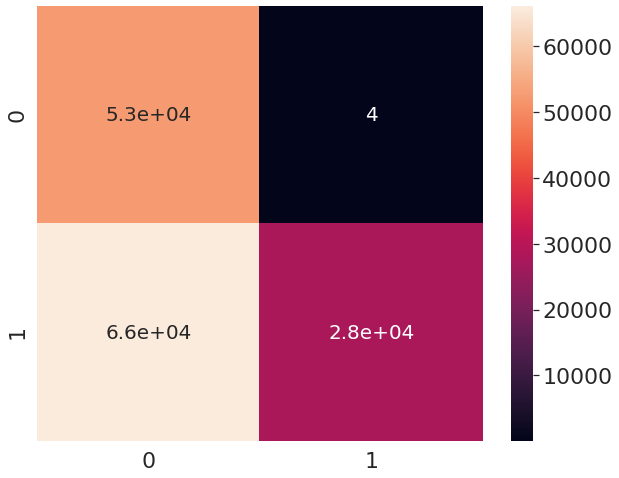

AUC score:  0.6480374656383642


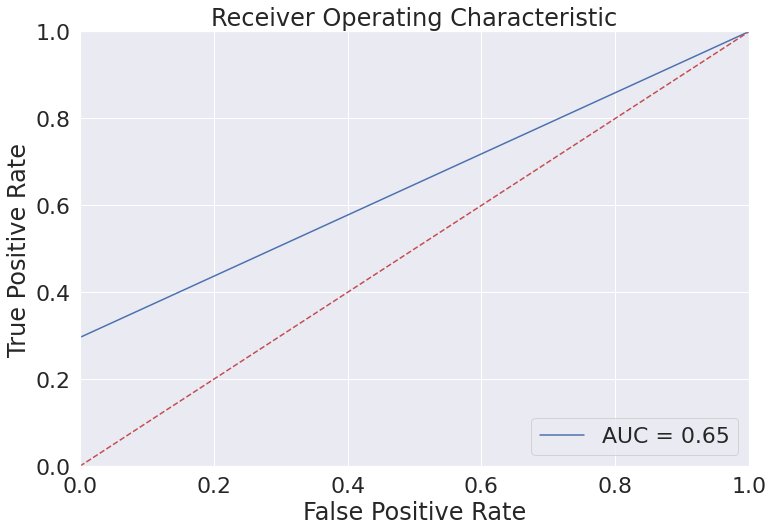

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [105]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.443     1.000     0.614     52572
           2      1.000     0.296     0.457     93817

    accuracy                          0.549    146389
   macro avg      0.722     0.648     0.536    146389
weighted avg      0.800     0.549     0.514    146389



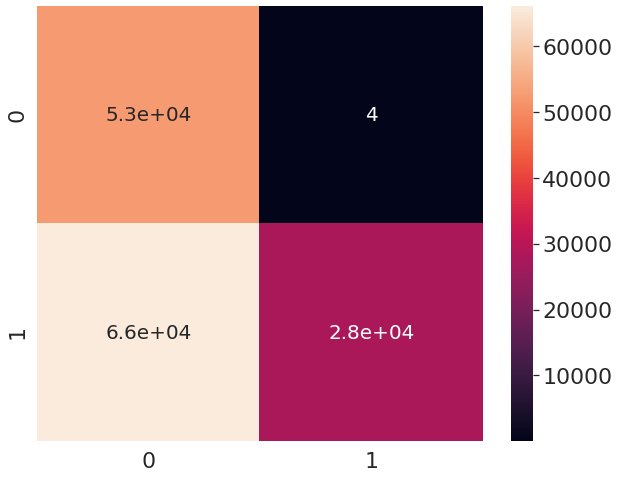

AUC score:  0.648133397079361


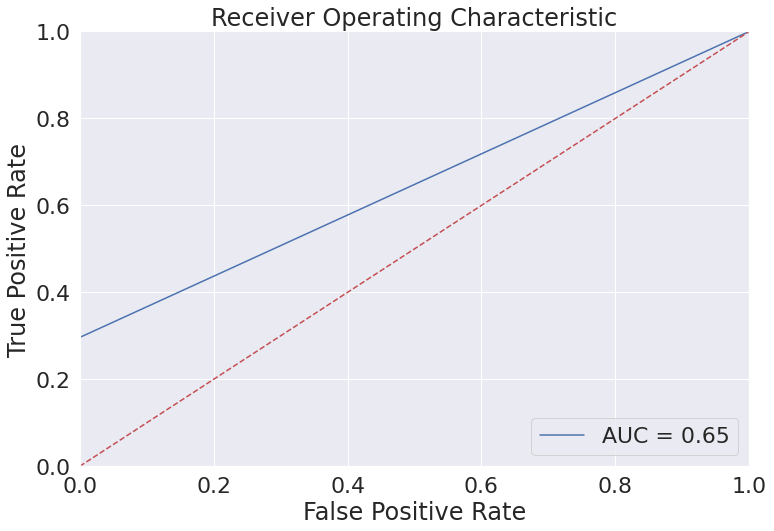

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [106]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     1.000     1.000     36592
           2      1.000     1.000     1.000    128458

    accuracy                          1.000    165050
   macro avg      1.000     1.000     1.000    165050
weighted avg      1.000     1.000     1.000    165050



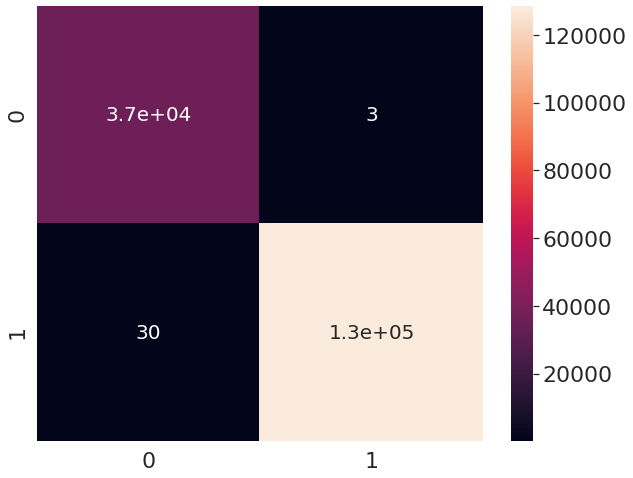

AUC score:  0.9998422377498425


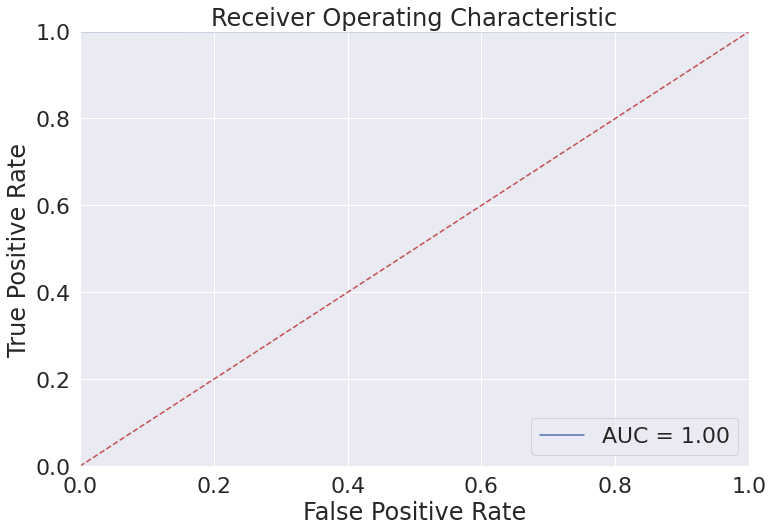

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [107]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     1.000     1.000     36592
           2      1.000     1.000     1.000    128458

    accuracy                          1.000    165050
   macro avg      1.000     1.000     1.000    165050
weighted avg      1.000     1.000     1.000    165050



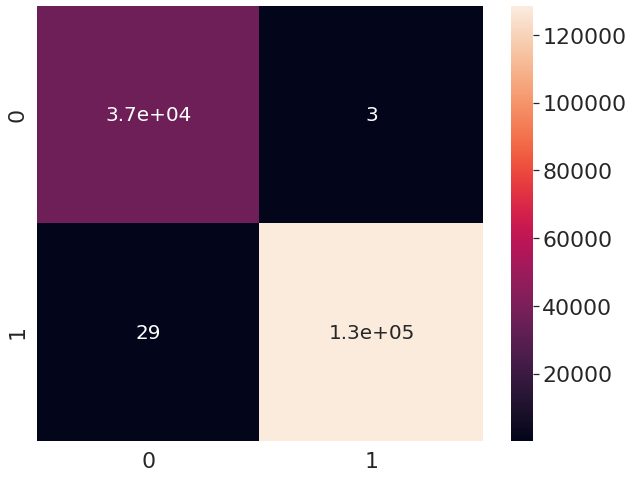

AUC score:  0.999846130072625


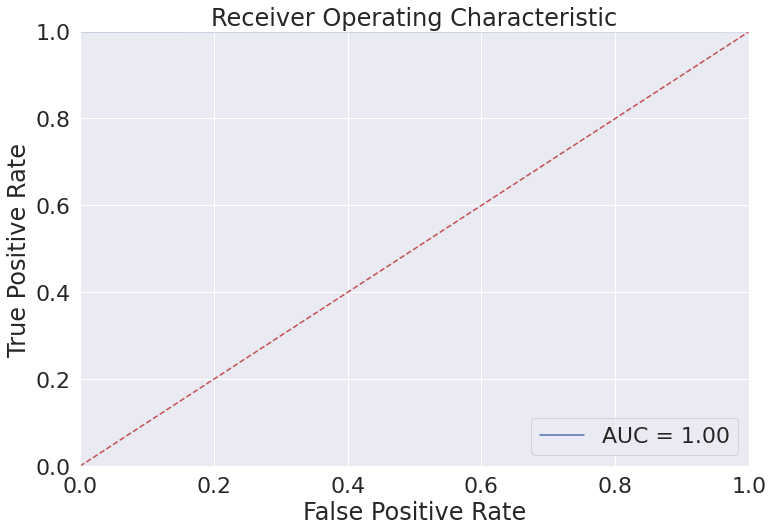

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [108]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)